In [1]:
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from lsst.daf.butler import Butler

In [2]:
matplotlib.rcParams['ps.useafm']=True
matplotlib.rcParams['pdf.use14corefonts']=True
matplotlib.rcParams['text.usetex']=True
matplotlib.rcParams['ps.useafm']=True
matplotlib.rcParams['pdf.use14corefonts']=True
matplotlib.rcParams['text.usetex']=True
matplotlib.rcParams['legend.fontsize']=14
matplotlib.rcParams['legend.numpoints']=1
matplotlib.rcParams['legend.frameon']=False
matplotlib.rcParams['legend.handlelength']=0.
matplotlib.rcParams['xtick.minor.visible']=True
matplotlib.rcParams['ytick.minor.visible']=True
matplotlib.rcParams['ytick.direction']='inout'
matplotlib.rcParams['xtick.direction']='inout'
if matplotlib.rcParams['xtick.direction']=='inout':
    matplotlib.rcParams['xtick.major.size']=2.*matplotlib.rcParams['xtick.major.size']
    matplotlib.rcParams['xtick.minor.size']=2.*matplotlib.rcParams['xtick.minor.size']
if matplotlib.rcParams['ytick.direction']=='inout':
    matplotlib.rcParams['ytick.major.size']=2.*matplotlib.rcParams['ytick.major.size']
    matplotlib.rcParams['ytick.minor.size']=2.*matplotlib.rcParams['ytick.minor.size']
matplotlib.rcParams['figure.subplot.bottom']=0.1
matplotlib.rcParams['figure.subplot.top']=0.95
matplotlib.rcParams['figure.subplot.right']=0.95
matplotlib.rcParams['figure.subplot.left']=0.095
matplotlib.rcParams['axes.labelsize']=18
matplotlib.rc('font',size=18)

In [8]:
REPO="/project/hsc/gen3repo/rc2w06_ssw06"
collection="u/kannawad/gaap1"

In [9]:
butler = Butler(REPO, run=collection)

In [10]:
dataId = {'tract': 9615, 'patch':23, 'band':'i'}
photoCalib = butler.get("deepCoadd_calexp", **dataId).getPhotoCalib()
meas_i = butler.get("deepCoadd_meas", **dataId)
meas = meas_i  # alias

dataId['band'] = 'r'
meas_r = butler.get("deepCoadd_meas", **dataId)

dataId['band'] = 'g'
meas_g = butler.get("deepCoadd_meas", **dataId)

In [11]:
np.isnan(meas['ext_gaap_GaapFlux_1_15x_4_0_instFlux']).sum()

269

In [5]:
psf_stars = meas['calib_psf_used']
all_stars = meas['base_ClassificationExtendedness_value']<0.2

In [6]:
meas_r['ext_gaap_GaapFlux_1_15x_4_0_instFlux']

array([2.591441  ,        nan,        nan, ..., 0.65359354, 0.00483982,
       1.73092692])

In [7]:
instFluxKey = 'ext_gaap_GaapFlux_1_15x_4_0'

In [8]:
#g_r = -2.5*np.log10(meas_g['ext_gaap_GaapFlux_1_15x_4_0_instFlux']/meas_r['ext_gaap_GaapFlux_1_15x_4_0_instFlux'])
#r_i = -2.5*np.log10(meas_r['ext_gaap_GaapFlux_1_15x_4_0_instFlux']/meas['ext_gaap_GaapFlux_1_15x_4_0_instFlux'])

g_r = photoCalib.instFluxToMagnitude(meas_g, instFluxKey)[:,0]\
      -photoCalib.instFluxToMagnitude(meas_r, instFluxKey)[:,0]
    
r_i = photoCalib.instFluxToMagnitude(meas_r, instFluxKey)[:,0]\
      -photoCalib.instFluxToMagnitude(meas_i, instFluxKey)[:,0]

In [15]:
cmodelFluxKey = "modelfit_CModel"
g_cmodel = photoCalib.instFluxToMagnitude(meas_g, cmodelFluxKey)[:,0]
r_cmodel = photoCalib.instFluxToMagnitude(meas_r, cmodelFluxKey)[:,0]
i_cmodel = photoCalib.instFluxToMagnitude(meas_i, cmodelFluxKey)[:,0]

g_r_cmodel = g_cmodel - r_cmodel
r_i_cmodel = r_cmodel - i_cmodel

In [16]:
photoCalib.instFluxToMagnitude?

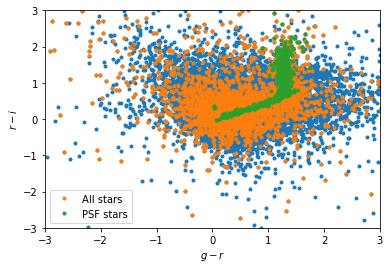

In [11]:
fig, ax = plt.subplots()
ax.plot(g_r, r_i, '.')
ax.plot(g_r[all_stars], r_i[all_stars],'.',label='All stars')
ax.plot(g_r[psf_stars], r_i[psf_stars],'.', label='PSF stars')
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_xlabel('$g-r$')
ax.set_ylabel('$r-i$')
ax.legend(loc='best')

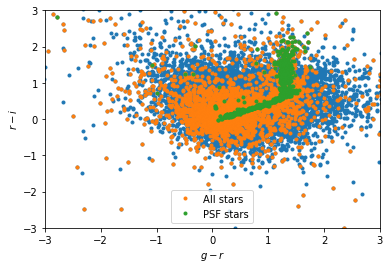

In [17]:
fig, ax = plt.subplots()
ax.plot(g_r_cmodel, r_i_cmodel, '.')
ax.plot(g_r_cmodel[all_stars], r_i_cmodel[all_stars],'.',label='All stars')
ax.plot(g_r_cmodel[psf_stars], r_i_cmodel[psf_stars],'.', label='PSF stars')
ax.set_xlim([-3,3])
ax.set_ylim([-3,3])
ax.set_xlabel('$g-r$')
ax.set_ylabel('$r-i$')
ax.legend(loc='best')

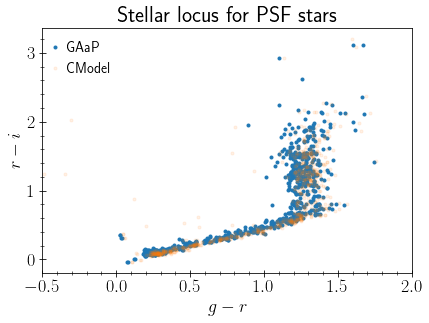

In [56]:
fig, ax = plt.subplots()
ax.plot(g_r[psf_stars], r_i[psf_stars], '.', label='GAaP')
ax.plot(g_r_cmodel[psf_stars], r_i_cmodel[psf_stars], '.', alpha=0.1, label='CModel')
ax.set_xlim([-0.5,2])
ax.set_xlabel(r"$g-r$")
ax.set_ylabel(r"$r-i$")
ax.set_title('Stellar locus for PSF stars')
ax.legend(loc='best')

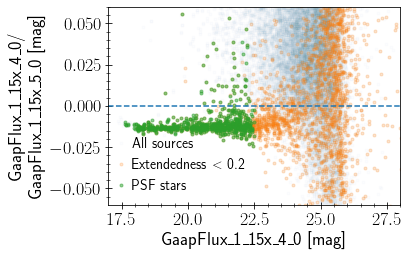

In [54]:
instFluxKey1 = 'ext_gaap_GaapFlux_1_15x_4_0'
instFluxKey2 = 'ext_gaap_GaapFlux_1_15x_5_0'

growth = photoCalib.instFluxToMagnitude(meas, instFluxKey1)[:,0]-photoCalib.instFluxToMagnitude(meas, instFluxKey2)[:,0]
imag = photoCalib.instFluxToMagnitude(meas, instFluxKey)[:,0]

fig, ax = plt.subplots()
ax.plot(imag, growth, '.',alpha=0.01,label='All sources')
ax.plot(imag[all_stars], growth[all_stars], '.',alpha=0.2, label=r"Extendedness $<$ 0.2")
ax.plot(imag[psf_stars], growth[psf_stars], '.',alpha=0.5, label='PSF stars')
ax.axhline(0.0,ls='--')
#ax.set_xlim([-11,3])
ax.set_xlim([17,28])
ax.set_xlabel("GaapFlux\_1\_15x\_4\_0 [mag]")
ax.set_ylabel("GaapFlux\_1\_15x\_4\_0/ \n GaapFlux\_1\_15x\_5\_0 [mag]")
ax.set_ylim([-0.06,0.06])
ax.legend(loc='best')
fig.tight_layout()

In [33]:
ax.text?

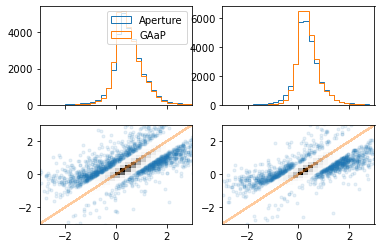

In [160]:
instFluxKey = 'ext_gaap_GaapFlux_1_15x_4_0'
mag_gaap_g = photoCalib.instFluxToMagnitude(meas_g, instFluxKey)[:,0]
mag_gaap_r = photoCalib.instFluxToMagnitude(meas_r, instFluxKey)[:,0]
mag_gaap_i = photoCalib.instFluxToMagnitude(meas_i, instFluxKey)[:,0]

instFluxAperKey = 'base_CircularApertureFlux_9_0'
mag_aper_g = photoCalib.instFluxToMagnitude(meas_g, instFluxAperKey)[:,0]
mag_aper_r = photoCalib.instFluxToMagnitude(meas_r, instFluxAperKey)[:,0]
mag_aper_i = photoCalib.instFluxToMagnitude(meas_i, instFluxAperKey)[:,0]

#g_r = -2.5*np.log10(meas_g['ext_gaap_GaapFlux_1_15x_4_0_instFlux']/meas_r['ext_gaap_GaapFlux_1_15x_4_0_instFlux'])
#r_i = -2.5*np.log10(meas_r['ext_gaap_GaapFlux_1_15x_4_0_instFlux']/meas['ext_gaap_GaapFlux_1_15x_4_0_instFlux'])
g_r = mag_gaap_g - mag_gaap_r
r_i = mag_gaap_r - mag_gaap_i

#aper_g_r = -2.5*np.log10(meas_g['base_CircularApertureFlux_9_0_instFlux']/meas_r['base_CircularApertureFlux_9_0_instFlux'])
#aper_r_i = -2.5*np.log10(meas_r['base_CircularApertureFlux_9_0_instFlux']/meas['base_CircularApertureFlux_9_0_instFlux'])
aper_g_r = mag_aper_g - mag_aper_r
aper_r_i = mag_aper_r - mag_aper_i


xrange = [[-3,3],[-3,3]]
fig, ax = plt.subplots(2,2,sharex=True)
bins = np.linspace(-3,3,31)
ax[0,0].hist(aper_g_r,bins=bins,histtype='step',label='Aperture')
ax[0,0].hist(g_r,bins=bins,histtype='step',label='GAaP')
ax[0,1].hist(aper_r_i,bins=bins,histtype='step',label='Aperture')
ax[0,1].hist(r_i,bins=bins,histtype='step',label='GAaP')
ax[0,0].legend(loc='best')
im = [None,None]
bins = 30
im[0]=ax[1,0].hist2d(aper_g_r, g_r, bins=bins, range=xrange, cmap=cm.gray_r)
im[1]=ax[1,1].hist2d(aper_r_i, r_i, bins=bins, range=xrange, cmap=cm.gray_r)
outliers = np.abs(aper_g_r-g_r)>0.7
ax[1,0].plot(aper_g_r[outliers],g_r[outliers],'.',alpha=0.1)
outliers = np.abs(aper_r_i-r_i)>0.7
ax[1,1].plot(aper_r_i[outliers],r_i[outliers],'.',alpha=0.1)
for _im,_ax in zip(im,ax[1]):
    #_ax.set_xlim([-3,3])
    #_ax.set_ylim([-3,3])
    _ax.plot(g_r, g_r, ':', color='C1',alpha=0.4)

<ipython-input-156-bc0ab35e5782>:1: RuntimeWarning: invalid value encountered in log10
  growth_gaap = -2.5*np.log10(meas['ext_gaap_GaapFlux_1_15x_4_0_instFlux']/meas['ext_gaap_GaapFlux_1_15x_5_0_instFlux'])
<ipython-input-156-bc0ab35e5782>:2: RuntimeWarning: invalid value encountered in log10
  growth_aper = -2.5*np.log10(meas['base_CircularApertureFlux_9_0_instFlux']/meas['base_CircularApertureFlux_12_0_instFlux'])


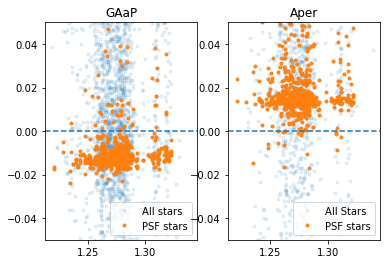

In [156]:
growth_gaap = -2.5*np.log10(meas['ext_gaap_GaapFlux_1_15x_4_0_instFlux']/meas['ext_gaap_GaapFlux_1_15x_5_0_instFlux'])
growth_aper = -2.5*np.log10(meas['base_CircularApertureFlux_9_0_instFlux']/meas['base_CircularApertureFlux_12_0_instFlux'])

growth_gaap = photoCalib.instFluxToMagnitude(meas, instFluxKey1)[:,0]\
             -photoCalib.instFluxToMagnitude(meas, instFluxKey2)[:,0]

instFluxAperKey1 = 'base_CircularApertureFlux_9_0'
instFluxAperKey2 = 'base_CircularApertureFlux_12_0'
growth_aper = photoCalib.instFluxToMagnitude(meas, instFluxAperKey1)[:,0]\
             -photoCalib.instFluxToMagnitude(meas, instFluxAperKey2)[:,0]

psf_size = (0.5*(meas['base_SdssShape_psf_xx']+meas['base_SdssShape_psf_yy']))**0.5

fig, ax = plt.subplots(1,2)
ax[0].plot(psf_size[all_stars], growth_gaap[all_stars], '.', alpha=0.1, label='All stars')
ax[0].plot(psf_size[psf_stars], growth_gaap[psf_stars], '.', alpha=0.9, label='PSF stars')
ax[0].set_title('GAaP')

ax[1].plot(psf_size[all_stars], growth_aper[all_stars], '.', alpha=0.1, label='All Stars')
ax[1].plot(psf_size[psf_stars], growth_aper[psf_stars], '.', alpha=0.9, label='PSF stars')
ax[1].set_title('Aper')

for _ax in ax:
    _ax.axhline(0.0,ls='--')
    #ax.set_xlim([-11,3])
    _ax.set_ylim([-0.05,0.05])
    
    _ax.legend(loc='best')

<ipython-input-53-dd2e4d535dc8>:1: RuntimeWarning: invalid value encountered in log10
  growth = -2.5*np.log10(meas['base_CircularApertureFlux_9_0_instFlux']/meas['base_CircularApertureFlux_12_0_instFlux'])
<ipython-input-53-dd2e4d535dc8>:2: RuntimeWarning: invalid value encountered in log10
  imag = -2.5*np.log10(meas['base_CircularApertureFlux_9_0_instFlux'])


(-0.06, 0.06)

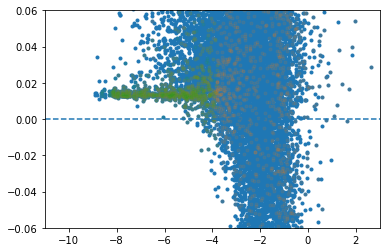

In [53]:
growth = -2.5*np.log10(meas['base_CircularApertureFlux_9_0_instFlux']/meas['base_CircularApertureFlux_12_0_instFlux'])
imag = -2.5*np.log10(meas['base_CircularApertureFlux_9_0_instFlux'])

fig, ax = plt.subplots()
ax.plot(imag, growth, '.')
ax.plot(imag[all_stars], growth[all_stars], '.',alpha=0.1)
ax.plot(imag[psf_stars], growth[psf_stars], '.',alpha=0.1)
ax.axhline(0.0,ls='--')
ax.set_xlim([-11,3])
ax.set_ylim([-0.06,0.06])

In [44]:
meas.schema.getOrderedNames()

['id',
 'coord_ra',
 'coord_dec',
 'parent',
 'merge_footprint_i',
 'merge_footprint_r',
 'merge_footprint_z',
 'merge_footprint_y',
 'merge_footprint_g',
 'merge_footprint_N921',
 'merge_footprint_N816',
 'merge_footprint_N1010',
 'merge_footprint_N387',
 'merge_footprint_N515',
 'merge_footprint_sky',
 'merge_peak_i',
 'merge_peak_r',
 'merge_peak_z',
 'merge_peak_y',
 'merge_peak_g',
 'merge_peak_N921',
 'merge_peak_N816',
 'merge_peak_N1010',
 'merge_peak_N387',
 'merge_peak_N515',
 'merge_peak_sky',
 'deblend_runtime',
 'deblend_iterations',
 'deblend_nChild',
 'deblend_deblendedAsPsf',
 'deblend_tooManyPeaks',
 'deblend_parentTooBig',
 'deblend_masked',
 'deblend_sedConvergenceFailed',
 'deblend_morphConvergenceFailed',
 'deblend_blendConvergenceFailedFlag',
 'deblend_edgePixels',
 'deblend_failed',
 'deblend_error',
 'deblend_skipped',
 'deblend_peak_center_x',
 'deblend_peak_center_y',
 'deblend_peakId',
 'deblend_peak_instFlux',
 'deblend_modelType',
 'deblend_nPeaks',
 'deble